In [2]:
import numpy as np
import skimage.transform as skt
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import skimage.transform as skt
import cv2
import tensorflow as tf
from tqdm import tqdm
from ipyfilechooser import FileChooser
from skimage.color import rgba2rgb
from IPython.display import clear_output


2023-04-11 13:17:02.765238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 13:17:02.881795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rich/Documents/school/2023/Spring/computational_photography/CCM_project/U_net/.pyenv/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-11 13:17:02.881815: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-11 13:17:03.501385: W tensorflow/compiler/xla/stream_executor/platform/default/ds

In [3]:
img_ext = ('.jpg', '.png', '.bmp', '.tif')
captured_path = "/home/rich/Documents/school/2023/Spring/computational_photography/camphotos"
ref_dir = "/home/rich/Documents/school/2023/Spring/computational_photography/refphotos"
# get the list of image files in the ccm and ref directories
captured_file_list = [f for f in os.listdir(captured_path) if f.endswith(img_ext)]
gt_file_list = [f for f in os.listdir(ref_dir) if f.endswith(img_ext)]
# if there are no files in the ccm directory, exit
if len(captured_file_list) == 0:
    print('No image files in the ccm directory')
    exit(1)

# if the number of files in the ccm and ref directories are not the same, exit
# as this is not a valid dataset
if len(captured_file_list) != len(gt_file_list):
    print('The number of files in the ccm and ref directories are not the same')
    exit(1)


In [17]:
reshape_shape = (128,128) #[128,128,3]

# Get number of images
num_images = len(captured_file_list)

# Initialize empty numpy array to store images
imgs = np.zeros((num_images, *reshape_shape), dtype=np.uint8)

# Loop through each image file and read directly into the numpy array
for i, file in enumerate(tqdm(gt_file_list)):
    img = cv2.imread(os.path.join(ref_dir, file), cv2.IMREAD_GRAYSCALE)
    # scale everything to 0-1
    img = img - np.min(img)
    #img = img / np.max(img)
    # resize to 128x128
    img = cv2.resize(img, reshape_shape)
    
    imgs[i, :, :] = img

# Save numpy array to file
np.save('ref_images.npy', imgs)

imgs = np.zeros((num_images, *(reshape_shape)), dtype=np.uint8)

for i, file in enumerate(tqdm(captured_file_list)):
    img = cv2.imread(os.path.join(captured_path, file), cv2.IMREAD_GRAYSCALE)
    img = img - np.min(img)
    #img = img / np.max(img)
    img = cv2.resize(img, reshape_shape)
    imgs[i, :, :] = img

np.save('captured_images.npy', imgs)
imgs = None # free up memory

100%|██████████| 10000/10000 [00:11<00:00, 842.91it/s]


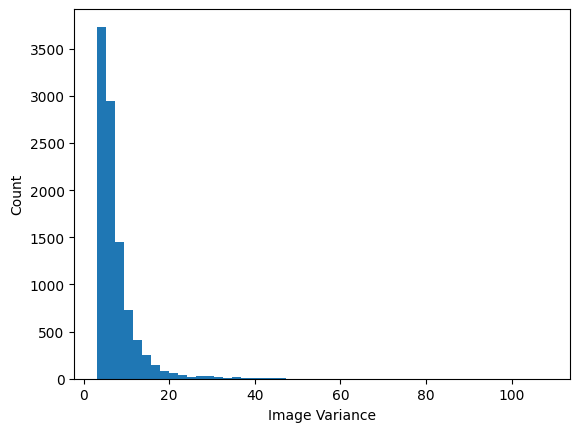

In [23]:
image_ndarray = np.load('captured_images.npy')
mean_image = np.mean(image_ndarray, axis=0)
image_variances = []
for img in image_ndarray:
    diff = img - mean_image
    variance = np.mean(np.square(diff))
    image_variances.append(variance)
plt.hist(image_variances, bins=50)
plt.xlabel('Image Variance')
plt.ylabel('Count')
plt.show()
image_ndarray = None # free up memory